Лабораторная работа №4

## Случайный лес (Random Forest)

## 2. Создание бейзлайна и оценка качества

Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, 
    classification_report, precision_recall_curve, auc
)
import warnings
warnings.filterwarnings('ignore')

Загрузка данных

In [2]:
# Загрузка данных
df_water = pd.read_csv('water_potability.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'], index_col=0)
df_concrete = pd.read_csv('concrete.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'])

print(f"Размер данных (вода): {df_water.shape}")
print(f"Размер данных (бетон): {df_concrete.shape}")

Размер данных (вода): (3276, 10)
Размер данных (бетон): (1030, 9)


### 2a. Подготовка данных и обучение baseline моделей

In [3]:
# удаление пропусков для простого baseline
df_water_clean = df_water.dropna()
df_concrete_clean = df_concrete.dropna()

# разделение на признаки и целевую переменную
X_water = df_water_clean.drop('Potability', axis=1)
y_water = df_water_clean['Potability']

X_concrete = df_concrete_clean.iloc[:, :-1]
y_concrete = df_concrete_clean.iloc[:, -1]

# разделение на обучающую и тестовую выборки
X_train_water, X_test_water, y_train_water, y_test_water = train_test_split(
    X_water, y_water, test_size=0.3, random_state=42
)

X_train_concrete, X_test_concrete, y_train_concrete, y_test_concrete = train_test_split(
    X_concrete, y_concrete, test_size=0.3, random_state=42
)

print(f"Классификация - тренировочная: {X_train_water.shape}, тестовая: {X_test_water.shape}")
print(f"Регрессия - тренировочная: {X_train_concrete.shape}, тестовая: {X_test_concrete.shape}")

Классификация - тренировочная: (1407, 9), тестовая: (604, 9)
Регрессия - тренировочная: (721, 8), тестовая: (309, 8)


Обучим модели случайного леса без качественной предобработки данных. Удалим только пропуски, чтобы модель не выдавала ошибку.

In [4]:
# обучение случайного леса для классификации
rf_clf_baseline = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
rf_clf_baseline.fit(X_train_water, y_train_water)
y_pred_water_baseline = rf_clf_baseline.predict(X_test_water)
y_pred_proba_water_baseline = rf_clf_baseline.predict_proba(X_test_water)[:, 1]

# обучение случайного леса для регрессии
rf_reg_baseline = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg_baseline.fit(X_train_concrete, y_train_concrete)
y_pred_concrete_baseline = rf_reg_baseline.predict(X_test_concrete)

### 2b. Оценка качества моделей

Выведем и проанализируем метрики для модели классификации.

Метрики качества (Случайный лес - baseline):
  Accuracy:  0.6705
  Precision: 0.6582
  Recall:    0.4177
  F1-score:  0.5111
  ROC-AUC:   0.6901
  PR-AUC:    0.6243

Матрица ошибок:


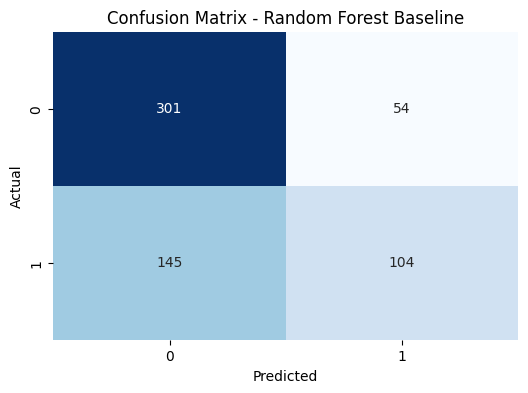


Отчет о классификации:
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       355
           1       0.66      0.42      0.51       249

    accuracy                           0.67       604
   macro avg       0.67      0.63      0.63       604
weighted avg       0.67      0.67      0.65       604



In [5]:
accuracy = accuracy_score(y_test_water, y_pred_water_baseline)
precision = precision_score(y_test_water, y_pred_water_baseline, zero_division=0)
recall = recall_score(y_test_water, y_pred_water_baseline, zero_division=0)
f1 = f1_score(y_test_water, y_pred_water_baseline, zero_division=0)
roc_auc = roc_auc_score(y_test_water, y_pred_proba_water_baseline)
pr_curve = precision_recall_curve(y_test_water, y_pred_proba_water_baseline)
pr_auc = auc(pr_curve[1], pr_curve[0])
cm = confusion_matrix(y_test_water, y_pred_water_baseline)

print(f"Метрики качества (Случайный лес - baseline):")
print(f"  Accuracy:  {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-score:  {f1:.4f}")
print(f"  ROC-AUC:   {roc_auc:.4f}")
print(f"  PR-AUC:    {pr_auc:.4f}")

print(f"\nМатрица ошибок:")
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest Baseline')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"\nОтчет о классификации:")
print(classification_report(y_test_water, y_pred_water_baseline))

*Метрики на сырых данных получислись не очень высокими, хотя они и лучше, чем у KNN или логистической регрессии. Кажется, что модель все еще пытается угадывать значения классов.*

#### Оценка качества модели регрессии

In [6]:
mse = mean_squared_error(y_test_concrete, y_pred_concrete_baseline)
mae = mean_absolute_error(y_test_concrete, y_pred_concrete_baseline)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_concrete, y_pred_concrete_baseline)

print(f"Метрики качества (Случайный лес - baseline):")
print(f"  MSE:  {mse:.4f}")
print(f"  MAE:  {mae:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  R²:   {r2:.4f}")

Метрики качества (Случайный лес - baseline):
  MSE:  29.8643
  MAE:  3.7512
  RMSE: 5.4648
  R²:   0.8896


*Метрики регрессии показывают хорошие результаты. Случайный лес на сырых данных показал достаточно высокие значения R² и низкую ошибку.*

#### Визуализация результатов baseline подхода

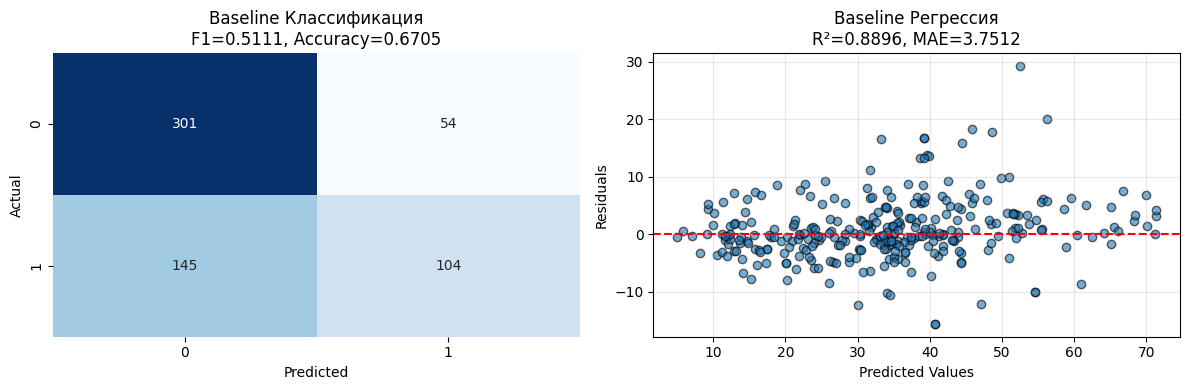

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# матрица ошибок для классификации
cm_baseline_clf = confusion_matrix(y_test_water, y_pred_water_baseline)
sns.heatmap(cm_baseline_clf, annot=True, fmt='d', ax=axes[0], cmap='Blues', cbar=False)
axes[0].set_title(f'Baseline Классификация\nF1={f1:.4f}, Accuracy={accuracy:.4f}')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# график остатков для регрессии
residuals_baseline_reg = y_test_concrete - y_pred_concrete_baseline
axes[1].scatter(y_pred_concrete_baseline, residuals_baseline_reg, alpha=0.6, edgecolors='k')
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_title(f'Baseline Регрессия\nR²={r2:.4f}, MAE={mae:.4f}')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Улучшение бейзлайна

### 3a. Формулирование гипотез улучшения

**Гипотеза 1:** Заполнение пропусков медианой улучшит качество моделей

**Гипотеза 2:** Стандартизация признаков может повлиять на качество (хотя случайный лес не требует масштабирования)

**Гипотеза 3:** Подбор оптимальных гиперпараметров (n_estimators, max_depth, min_samples_split) улучшит результаты

**Гипотеза 4:** Удаление выбросов методом IQR улучшит качество модели

**Гипотеза 5:** Создание новых признаков

### 3b. Проверка гипотез

#### Гипотеза 1: Заполнение пропусков медианой

Проверим гипотезу 1 для классификации.

Классификация (с заполнением пропусков):
  Accuracy:  0.7864
  F1-score:  0.6645
  ROC-AUC:   0.8692
  PR-AUC:    0.8124

Матрица ошибок:

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       617
           1       0.80      0.57      0.66       366

    accuracy                           0.79       983
   macro avg       0.79      0.74      0.75       983
weighted avg       0.79      0.79      0.78       983

Метрики качества (Случайный лес - baseline):
  Accuracy:  0.6705
  Precision: 0.6582
  Recall:    0.4177
  F1-score:  0.5111
  ROC-AUC:   0.6901
  PR-AUC:    0.6243


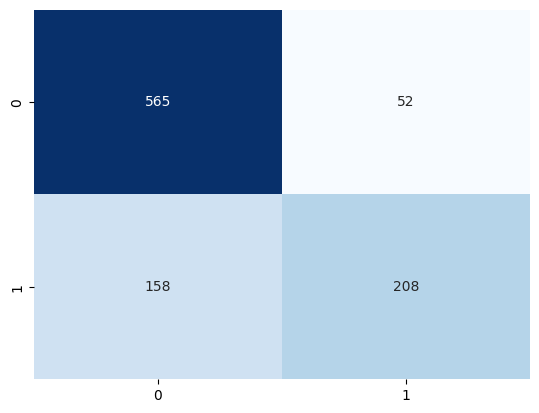

In [8]:
# загрузка данных заново
df_water_hyp1 = pd.read_csv('water_potability.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'], index_col=0)

# заполнение пропусков медианой по классам для классификации
df_water_hyp1['ph'] = df_water_hyp1.groupby('Potability')['ph'].transform(lambda x: x.fillna(x.median()))
df_water_hyp1['Sulfate'] = df_water_hyp1.groupby('Potability')['Sulfate'].transform(lambda x: x.fillna(x.median()))
df_water_hyp1['Trihalomethanes'] = df_water_hyp1.groupby('Potability')['Trihalomethanes'].transform(lambda x: x.fillna(x.median()))

# разделение на признаки и целевую переменную
X_water_hyp1 = df_water_hyp1.drop('Potability', axis=1)
y_water_hyp1 = df_water_hyp1['Potability']

# разделение на train/test
X_train_water_h1, X_test_water_h1, y_train_water_h1, y_test_water_h1 = train_test_split(
    X_water_hyp1, y_water_hyp1, test_size=0.3, random_state=42
)

# обучение модели
rf_clf_hyp1 = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
rf_clf_hyp1.fit(X_train_water_h1, y_train_water_h1)
y_pred_water_h1 = rf_clf_hyp1.predict(X_test_water_h1)
y_pred_proba_water_h1 = rf_clf_hyp1.predict_proba(X_test_water_h1)[:, 1]

# метрики для классификации
acc_h1 = accuracy_score(y_test_water_h1, y_pred_water_h1)
f1_h1 = f1_score(y_test_water_h1, y_pred_water_h1, zero_division=0)
roc_auc_h1 = roc_auc_score(y_test_water_h1, y_pred_proba_water_h1)
pr_curve_h1 = precision_recall_curve(y_test_water_h1, y_pred_proba_water_h1)
pr_auc_h1 = auc(pr_curve_h1[1], pr_curve_h1[0])

cm_hyp1 = confusion_matrix(y_test_water_h1, y_pred_water_h1)

print(f"Классификация (с заполнением пропусков):")
print(f"  Accuracy:  {acc_h1:.4f}")
print(f"  F1-score:  {f1_h1:.4f}")
print(f"  ROC-AUC:   {roc_auc_h1:.4f}")
print(f"  PR-AUC:    {pr_auc_h1:.4f}")

print(f"\nМатрица ошибок:")
sns.heatmap(cm_hyp1, annot=True, fmt='d', cmap='Blues', cbar=False)
print(f"\nОтчет о классификации:")
print(classification_report(y_test_water_h1, y_pred_water_h1))


print(f"Метрики качества (Случайный лес - baseline):")
print(f"  Accuracy:  {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-score:  {f1:.4f}")
print(f"  ROC-AUC:   {roc_auc:.4f}")
print(f"  PR-AUC:    {pr_auc:.4f}")

*Заполнение пропусков улучшило метрики классификации. Модель стала четче распознавать оба класса. Но еще присутствует ошибка.*

Проверим гипотезу 1 для регрессии.

In [9]:
df_concrete_hyp1 = pd.read_csv('concrete.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'])
# заполнение пропусков для регрессии
df_concrete_hyp1 = df_concrete_hyp1.fillna(df_concrete_hyp1.median())

# отделяем признаки и целевую переменную
X_concrete_hyp1 = df_concrete_hyp1.iloc[:, :-1]
y_concrete_hyp1 = df_concrete_hyp1.iloc[:, -1]

# разделение на train/test
X_train_concrete_h1, X_test_concrete_h1, y_train_concrete_h1, y_test_concrete_h1 = train_test_split(
    X_concrete_hyp1, y_concrete_hyp1, test_size=0.3, random_state=42
)

# обучение модели случайного леса для регрессии
rf_reg_hyp1 = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg_hyp1.fit(X_train_concrete_h1, y_train_concrete_h1)
y_pred_concrete_h1 = rf_reg_hyp1.predict(X_test_concrete_h1)


# Метрики для регрессии
mae_h1 = mean_absolute_error(y_test_concrete_h1, y_pred_concrete_h1)
r2_h1 = r2_score(y_test_concrete_h1, y_pred_concrete_h1)
mse_h1 = mean_squared_error(y_test_concrete_h1, y_pred_concrete_h1)

print(f"\nРегрессия (с заполнением пропусков):")
print(f"  MAE:  {mae_h1:.4f}")
print(f"  R²:   {r2_h1:.4f}")
print(f"  MSE:  {mse_h1:.4f}")

print(f"Метрики качества (Случайный лес - baseline):")
print(f"  MSE:  {mse:.4f}")
print(f"  MAE:  {mae:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  R²:   {r2:.4f}")


Регрессия (с заполнением пропусков):
  MAE:  3.7512
  R²:   0.8896
  MSE:  29.8643
Метрики качества (Случайный лес - baseline):
  MSE:  29.8643
  MAE:  3.7512
  RMSE: 5.4648
  R²:   0.8896


*В датасете нет пропусков, поэтому эта гипотеза не применима для регрессии.*

#### Гипотеза 2: Стандартизация признаков

Проверим гипотезу 2 для классификации.

БЕЗ стандартизации классификация: Accuracy=0.7864, F1=0.6645, ROC-AUC=0.8692, PR-AUC=0.8124
БЕЗ стандартизации регрессия: MAE=3.7512, R²=0.8896, MSE=29.8643
СО стандартизацией классификация:  Accuracy=0.7864, F1=0.6645, ROC-AUC=0.8692, PR-AUC=0.8124
СО стандартизацией регрессия:  MAE=3.7608, R²=0.8891, MSE=30.0114


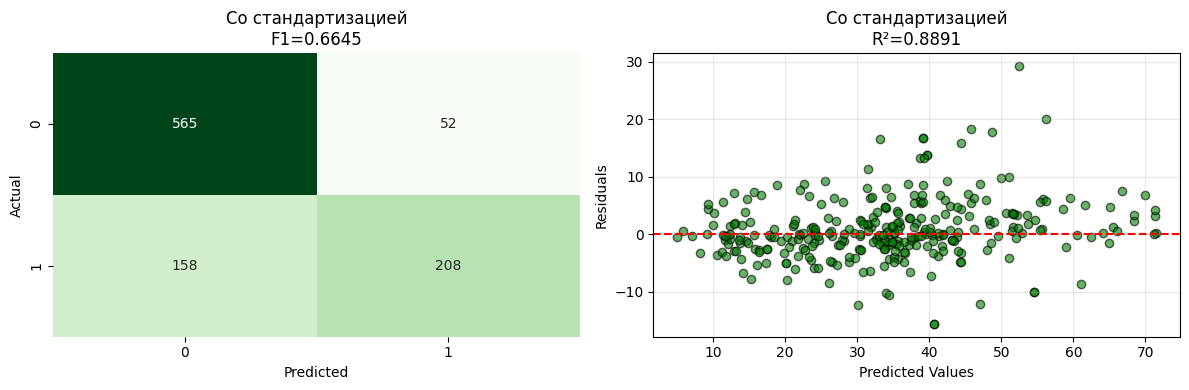

In [23]:
print(f"БЕЗ стандартизации классификация: Accuracy={acc_h1:.4f}, F1={f1_h1:.4f}, ROC-AUC={roc_auc_h1:.4f}, PR-AUC={pr_auc_h1:.4f}")
print(f"БЕЗ стандартизации регрессия: MAE={mae_h1:.4f}, R²={r2_h1:.4f}, MSE={mse_h1:.4f}")

# применяем стандартизацию
scaler_water_h2 = StandardScaler()
X_train_water_h2 = scaler_water_h2.fit_transform(X_train_water_h1)
X_test_water_h2 = scaler_water_h2.transform(X_test_water_h1)

scaler_concrete_h2 = StandardScaler()
X_train_concrete_h2 = scaler_concrete_h2.fit_transform(X_train_concrete_h1)
X_test_concrete_h2 = scaler_concrete_h2.transform(X_test_concrete_h1)

# обучение моделей со стандартизацией
rf_clf_hyp2 = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
rf_clf_hyp2.fit(X_train_water_h2, y_train_water_h1)
y_pred_water_h2 = rf_clf_hyp2.predict(X_test_water_h2)
y_pred_proba_water_h2 = rf_clf_hyp2.predict_proba(X_test_water_h2)[:, 1]

rf_reg_hyp2 = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg_hyp2.fit(X_train_concrete_h2, y_train_concrete_h1)
y_pred_concrete_h2 = rf_reg_hyp2.predict(X_test_concrete_h2)

# метрики для классификации
acc_h2 = accuracy_score(y_test_water_h1, y_pred_water_h2)
f1_h2 = f1_score(y_test_water_h1, y_pred_water_h2, zero_division=0)
roc_auc_h2 = roc_auc_score(y_test_water_h1, y_pred_proba_water_h2)
pr_curve_h2 = precision_recall_curve(y_test_water_h1, y_pred_proba_water_h2)
pr_auc_h2 = auc(pr_curve_h2[1], pr_curve_h2[0])

# метрики для регрессии
mae_h2 = mean_absolute_error(y_test_concrete_h1, y_pred_concrete_h2)
r2_h2 = r2_score(y_test_concrete_h1, y_pred_concrete_h2)
mse_h2 = mean_squared_error(y_test_concrete_h1, y_pred_concrete_h2)

print(f"СО стандартизацией классификация:  Accuracy={acc_h2:.4f}, F1={f1_h2:.4f}, ROC-AUC={roc_auc_h2:.4f}, PR-AUC={pr_auc_h2:.4f}")
print(f"СО стандартизацией регрессия:  MAE={mae_h2:.4f}, R²={r2_h2:.4f}, MSE={mse_h2:.4f}")

# визуализация
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# матрица ошибок для классификации
cm_h2 = confusion_matrix(y_test_water_h1, y_pred_water_h2)
sns.heatmap(cm_h2, annot=True, fmt='d', ax=axes[0], cmap='Greens', cbar=False)
axes[0].set_title(f'Со стандартизацией\nF1={f1_h2:.4f}')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# график остатков для регрессии
residuals_h2 = y_test_concrete_h1 - y_pred_concrete_h2
axes[1].scatter(y_pred_concrete_h2, residuals_h2, alpha=0.6, edgecolors='k', color='green')
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_title(f'Со стандартизацией\nR²={r2_h2:.4f}')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

*Масштабирование не улучшило метрики для обеих моделей. Значит модели случайного леса не чувствительны к масштабу признаков.*

#### Гипотеза 3: Подбор гиперпараметров

Проверим гипотезу 3 для классификации.

In [11]:
# подбор гиперпараметров для случайного леса с RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42, class_weight='balanced')

rs = RandomizedSearchCV(rf, param_dist, n_iter=20, scoring='f1', cv=5, random_state=42, n_jobs=-1)
rs.fit(X_train_water_h1, y_train_water_h1)

best_params = rs.best_params_
best_cv_score = rs.best_score_

print(f"Оптимальные параметры: {best_params}")
print(f"CV F1-score: {best_cv_score:.4f}")

# обучение с найденными параметрами
rf_clf_hyp3 = RandomForestClassifier(**best_params, random_state=42, class_weight='balanced')
rf_clf_hyp3.fit(X_train_water_h1, y_train_water_h1)
y_pred_water_h3 = rf_clf_hyp3.predict(X_test_water_h1)
y_pred_proba_water_h3 = rf_clf_hyp3.predict_proba(X_test_water_h1)[:, 1]

acc_h3 = accuracy_score(y_test_water_h1, y_pred_water_h3)
f1_h3 = f1_score(y_test_water_h1, y_pred_water_h3, zero_division=0)
roc_auc_h3 = roc_auc_score(y_test_water_h1, y_pred_proba_water_h3)
pr_curve_h3 = precision_recall_curve(y_test_water_h1, y_pred_proba_water_h3)
pr_auc_h3 = auc(pr_curve_h3[1], pr_curve_h3[0])

print(f"По умолчанию (гипотеза1): Accuracy={acc_h1:.4f}, F1={f1_h1:.4f}, ROC-AUC={roc_auc_h1:.4f}")
print(f"С подбором параметров: Accuracy={acc_h3:.4f}, F1={f1_h3:.4f}, ROC-AUC={roc_auc_h3:.4f}")

Оптимальные параметры: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}
CV F1-score: 0.7128
По умолчанию (гипотеза1): Accuracy=0.7864, F1=0.6645, ROC-AUC=0.8692
С подбором параметров: Accuracy=0.7823, F1=0.6825, ROC-AUC=0.8695


*Подбор гиперпараметров помог немного улучшить метрики модели и, соответственно, повысить её качество.*

Проверим гипотезу 3 для регрессии.

In [12]:
# подбор оптимальных гиперпараметров для случайного леса (RandomizedSearchCV)
from sklearn.model_selection import RandomizedSearchCV

param_dist_reg = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_reg = RandomForestRegressor(random_state=42)

rs_reg = RandomizedSearchCV(rf_reg, param_dist_reg, n_iter=30, scoring='r2', cv=5, random_state=42, n_jobs=-1)
rs_reg.fit(X_train_concrete_h1, y_train_concrete_h1)

best_params_reg = rs_reg.best_params_
best_cv_score_reg = rs_reg.best_score_

print(f"Оптимальные параметры (регрессия): {best_params_reg}")
print(f"CV R2-score: {best_cv_score_reg:.4f}")

# обучение с найденными параметрами
rf_reg_hyp3 = RandomForestRegressor(**best_params_reg, random_state=42)
rf_reg_hyp3.fit(X_train_concrete_h1, y_train_concrete_h1)
y_pred_concrete_h3 = rf_reg_hyp3.predict(X_test_concrete_h1)

r2_h3 = r2_score(y_test_concrete_h1, y_pred_concrete_h3)
mse_h3 = mean_squared_error(y_test_concrete_h1, y_pred_concrete_h3)
mae_h3 = mean_absolute_error(y_test_concrete_h1, y_pred_concrete_h3)
rmse_h3 = np.sqrt(mse_h3)

print(f"По умолчанию: MAE={mae_h1:.4f}, R2={r2_h1:.4f}, MSE={mse_h1:.4f}")
print(f"С подбором параметров: MAE={mae_h3:.4f}, R2={r2_h3:.4f}, MSE={mse_h3:.4f}")

Оптимальные параметры (регрессия): {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
CV R2-score: 0.9004
По умолчанию: MAE=3.7512, R2=0.8896, MSE=29.8643
С подбором параметров: MAE=3.7400, R2=0.8882, MSE=30.2619


*Подбор гиперпараметров для регрессии улучшил только MAE, остальные метрики ухудшились*

#### Гипотеза 4: Удаление выбросов методом IQR

In [13]:
def remove_outliers_iqr(X: pd.DataFrame, y: pd.Series = None, factor: float = 1.5):
    """ Удаляет строки, где хоть в одном числовом признаке значение выходит за пределы [Q1 - factor*IQR, Q3 + factor*IQR]. """
    numeric = X.select_dtypes(include=[np.number])
    Q1 = numeric.quantile(0.25)
    Q3 = numeric.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR
    mask = ((numeric >= lower) & (numeric <= upper)).all(axis=1)
    X_clean = X.loc[mask].copy()
    if y is None:
        return X_clean, mask
    return X_clean, y.loc[mask].copy(), mask

Проверим гипотезу 4 для классификации.

Классификация - до удаления выбросов: (2293, 9), после: (1856, 9) (удалено 437 строк)
Метрики классификации после удаления выбросов:
  Accuracy:  0.7792
  Precision: 0.7651
  Recall:    0.5874
  F1-score:  0.6646
  ROC-AUC:   0.8609
  PR-AUC:    0.8067
Метрики классификации предыдущей гипотезы
  Accuracy:  0.7823
  F1-score: 0.6825
  ROC-AUC:   0.8695
  PR-AUC:    0.8209


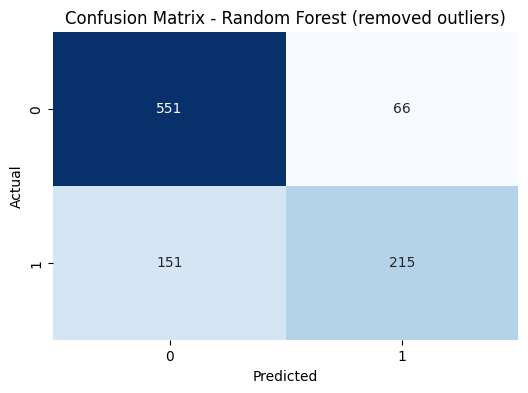

In [14]:
# Создаём X как DataFrame с автоматическим индексом (совместимо, если X_train_water_h1 - ndarray или DataFrame)
X_temp = pd.DataFrame(X_train_water_h1, columns=X_water_hyp1.columns)
# Создаём y как Series с тем же индексом, что и у X_temp
y_temp = pd.Series(y_train_water_h1, index=X_temp.index)
# Удаляем выбросы методом IQR
X_train_water_h4, y_train_water_h4, mask_w = remove_outliers_iqr(X_temp, y_temp, factor=1.5)
removed = len(X_temp) - len(X_train_water_h4)

print(f"Классификация - до удаления выбросов: {X_temp.shape}, после: {X_train_water_h4.shape} (удалено {removed} строк)")
# Обучение случайного леса на очищенных данных. Используем найденные ранее best_params (RandomizedSearchCV).
rf_clf_hyp4 = RandomForestClassifier(**best_params, random_state=42, class_weight='balanced')
rf_clf_hyp4.fit(X_train_water_h4, y_train_water_h4)
# Предсказания на тестовой выборке (без удаления выбросов в тесте)
y_pred_water_h4 = rf_clf_hyp4.predict(X_test_water_h1)
y_pred_proba_water_h4 = rf_clf_hyp4.predict_proba(X_test_water_h1)[:, 1]
# Метрики
acc_h4 = accuracy_score(y_test_water_h1, y_pred_water_h4)
precision_h4 = precision_score(y_test_water_h1, y_pred_water_h4, zero_division=0)
recall_h4 = recall_score(y_test_water_h1, y_pred_water_h4, zero_division=0)
f1_h4 = f1_score(y_test_water_h1, y_pred_water_h4, zero_division=0)
roc_auc_h4 = roc_auc_score(y_test_water_h1, y_pred_proba_water_h4)
pr_curve_h4 = precision_recall_curve(y_test_water_h1, y_pred_proba_water_h4)
pr_auc_h4 = auc(pr_curve_h4[1], pr_curve_h4[0])
cm_h4 = confusion_matrix(y_test_water_h1, y_pred_water_h4)


print("Метрики классификации после удаления выбросов:")
print(f"  Accuracy:  {acc_h4:.4f}")
print(f"  Precision: {precision_h4:.4f}")
print(f"  Recall:    {recall_h4:.4f}")
print(f"  F1-score:  {f1_h4:.4f}")
print(f"  ROC-AUC:   {roc_auc_h4:.4f}")
print(f"  PR-AUC:    {pr_auc_h4:.4f}")


print("Метрики классификации предыдущей гипотезы")
print(f"  Accuracy:  {acc_h3:.4f}")
print(f"  F1-score: {f1_h3:.4f}")
print(f"  ROC-AUC:   {roc_auc_h3:.4f}")
print(f"  PR-AUC:    {pr_auc_h3:.4f}")

# Матрица неточностей
plt.figure(figsize=(6,4))
sns.heatmap(cm_h4, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest (removed outliers)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


*После удаления выбросов основные метрики ухудшились. Гипотеза 4 не работает для классификации.*

Проверим гипотезу 4 для регерссии.

Регрессия - до удаления выбросов: (721, 8)
Регрессия - после удаления выбросов: (660, 8)
Регрессия БЕЗ удаления выбросов: MAE=3.7512, R²=0.8896, MSE=29.8643
Регрессия С удалением выбросов:  MAE=3.9019, R²=0.8870, MSE=30.5638


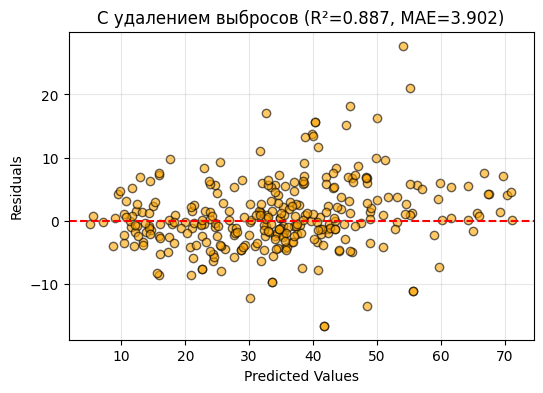

In [15]:
# Создаём X как DataFrame с автоматическим индексом
X_temp = pd.DataFrame(X_train_concrete_h1, columns=X_concrete_hyp1.columns)

# Создаём y как Series с ТЕМ ЖЕ индексом, что и у X_temp
y_temp = pd.Series(y_train_concrete_h1, index=X_temp.index)

X_train_concrete_h4, y_train_concrete_h4, mask_c = remove_outliers_iqr(
    X_temp, 
    y_temp,
    factor=1.5
)
print(f"Регрессия - до удаления выбросов: {X_train_concrete_h1.shape}")
print(f"Регрессия - после удаления выбросов: {X_train_concrete_h4.shape}")

# обучение модели регрессии после удаления выбросов
rf_reg_hyp4 = RandomForestRegressor(**best_params_reg, random_state=42)
rf_reg_hyp4.fit(X_train_concrete_h4, y_train_concrete_h4)
y_pred_concrete_h4 = rf_reg_hyp4.predict(X_test_concrete_h1)

mae_h4 = mean_absolute_error(y_test_concrete_h1, y_pred_concrete_h4)
r2_h4 = r2_score(y_test_concrete_h1, y_pred_concrete_h4)
mse_h4 = mean_squared_error(y_test_concrete_h1, y_pred_concrete_h4)

print(f"Регрессия БЕЗ удаления выбросов: MAE={mae_h1:.4f}, R²={r2_h1:.4f}, MSE={mse_h1:.4f}")
print(f"Регрессия С удалением выбросов:  MAE={mae_h4:.4f}, R²={r2_h4:.4f}, MSE={mse_h4:.4f}")

# Визуализация
plt.figure(figsize=(6, 4))
residuals_h4 = y_test_concrete_h1 - y_pred_concrete_h4
plt.scatter(y_pred_concrete_h4, residuals_h4, alpha=0.6, edgecolors='k', color='orange')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title(f'С удалением выбросов (R²={r2_h4:.3f}, MAE={mae_h4:.3f})')
plt.grid(alpha=0.3)
plt.show()

*Удаление выбросов может как улучшить, так и ухудшить качество модели. Случайный лес устойчив к выбросам благодаря ансамблированию.*

#### Гипотеза 5: Создание новых признаков

Создание новых признаков для задачи классификации.

In [ ]:
# загрузим данные заново для новых признаков
df_water_fe = pd.read_csv('water_potability.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'], index_col=0)

# заполнение пропусков медианой по классам
df_water_fe['ph'] = df_water_fe.groupby('Potability')['ph'].transform(lambda x: x.fillna(x.median()))
df_water_fe['Sulfate'] = df_water_fe.groupby('Potability')['Sulfate'].transform(lambda x: x.fillna(x.median()))
df_water_fe['Trihalomethanes'] = df_water_fe.groupby('Potability')['Trihalomethanes'].transform(lambda x: x.fillna(x.median()))

# разделяем на признаки и целевую переменную
X_water_fe = df_water_fe.drop('Potability', axis=1)
y_water_fe = df_water_fe['Potability']

# создание новых признаков
X_water_fe_extended = X_water_fe.copy()

# взаимодействие признаков
X_water_fe_extended['ph_sulfate'] = X_water_fe_extended['ph'] * X_water_fe_extended['Sulfate']
X_water_fe_extended['ph_turbidity'] = X_water_fe_extended['ph'] * X_water_fe_extended['Turbidity']
X_water_fe_extended['conductivity_sulfate'] = X_water_fe_extended['Conductivity'] * X_water_fe_extended['Sulfate']

# полиномиальные признаки
X_water_fe_extended['ph_squared'] = X_water_fe_extended['ph'] ** 2
X_water_fe_extended['conductivity_squared'] = X_water_fe_extended['Conductivity'] ** 2
X_water_fe_extended['organic_carbon_squared'] = X_water_fe_extended['Organic_carbon'] ** 2

# статистические признаки
X_water_fe_extended['feature_mean'] = X_water_fe_extended.mean(axis=1)
X_water_fe_extended['feature_std'] = X_water_fe_extended.std(axis=1)
X_water_fe_extended['feature_max'] = X_water_fe_extended.max(axis=1)
X_water_fe_extended['feature_min'] = X_water_fe_extended.min(axis=1)

# отношения между признаками (безопасность - деление на ноль)
X_water_fe_extended['ph_conductivity_ratio'] = X_water_fe_extended['ph'] / (X_water_fe_extended['Conductivity'] + 1e-6)
X_water_fe_extended['sulfate_turbidity_ratio'] = X_water_fe_extended['Sulfate'] / (X_water_fe_extended['Turbidity'] + 1e-6)

print(f"Исходное количество признаков: {X_water_fe.shape[1]}")
print(f"Количество признаков после инженерии: {X_water_fe_extended.shape[1]}")
print(f"\nНовые признаки: {list(X_water_fe_extended.columns[X_water_fe.shape[1]:])}")

Исходное количество признаков: 9
Количество признаков после инженерии: 21

Новые признаки: ['ph_sulfate', 'ph_turbidity', 'conductivity_sulfate', 'ph_squared', 'conductivity_squared', 'organic_carbon_squared', 'feature_mean', 'feature_std', 'feature_max', 'feature_min', 'ph_conductivity_ratio', 'sulfate_turbidity_ratio']


Обучение модели с новыми признаками

In [17]:
# разделение на train/test с новыми признаками
X_train_water_fe, X_test_water_fe, y_train_water_fe, y_test_water_fe = train_test_split(
    X_water_fe_extended, y_water_fe, test_size=0.3, random_state=42
)

# обучение случайного леса с новыми признаками
rf_clf_fe = RandomForestClassifier(random_state=42, **best_params, class_weight='balanced')
rf_clf_fe.fit(X_train_water_fe, y_train_water_fe)
y_pred_water_fe = rf_clf_fe.predict(X_test_water_fe)
y_pred_proba_water_fe = rf_clf_fe.predict_proba(X_test_water_fe)[:, 1]

# вычисление метрик
acc_fe = accuracy_score(y_test_water_fe, y_pred_water_fe)
f1_fe = f1_score(y_test_water_fe, y_pred_water_fe, zero_division=0)
roc_auc_fe = roc_auc_score(y_test_water_fe, y_pred_proba_water_fe)
pr_curve_fe = precision_recall_curve(y_test_water_fe, y_pred_proba_water_fe)
pr_auc_fe = auc(pr_curve_fe[1], pr_curve_fe[0])
precision_fe = precision_score(y_test_water_fe, y_pred_water_fe, zero_division=0)
recall_fe = recall_score(y_test_water_fe, y_pred_water_fe, zero_division=0)

print(f"Метрики качества (с новыми признаками):")
print(f"  Accuracy:  {acc_fe:.4f}")
print(f"  Precision: {precision_fe:.4f}")
print(f"  Recall:    {recall_fe:.4f}")
print(f"  F1-score:  {f1_fe:.4f}")
print(f"  ROC-AUC:   {roc_auc_fe:.4f}")
print(f"  PR-AUC:    {pr_auc_fe:.4f}")

print(f"\nМетрики качества (Гипотеза 3):")
print(f"  Accuracy:  {acc_h3:.4f}")
print(f"  F1-score:  {f1_h3:.4f}")
print(f"  ROC-AUC:   {roc_auc_h3:.4f}")
print(f"  PR-AUC:    {pr_auc_h3:.4f}")

Метрики качества (с новыми признаками):
  Accuracy:  0.7772
  Precision: 0.7442
  Recall:    0.6120
  F1-score:  0.6717
  ROC-AUC:   0.8617
  PR-AUC:    0.7958

Метрики качества (Гипотеза 3):
  Accuracy:  0.7823
  F1-score:  0.6825
  ROC-AUC:   0.8695
  PR-AUC:    0.8209


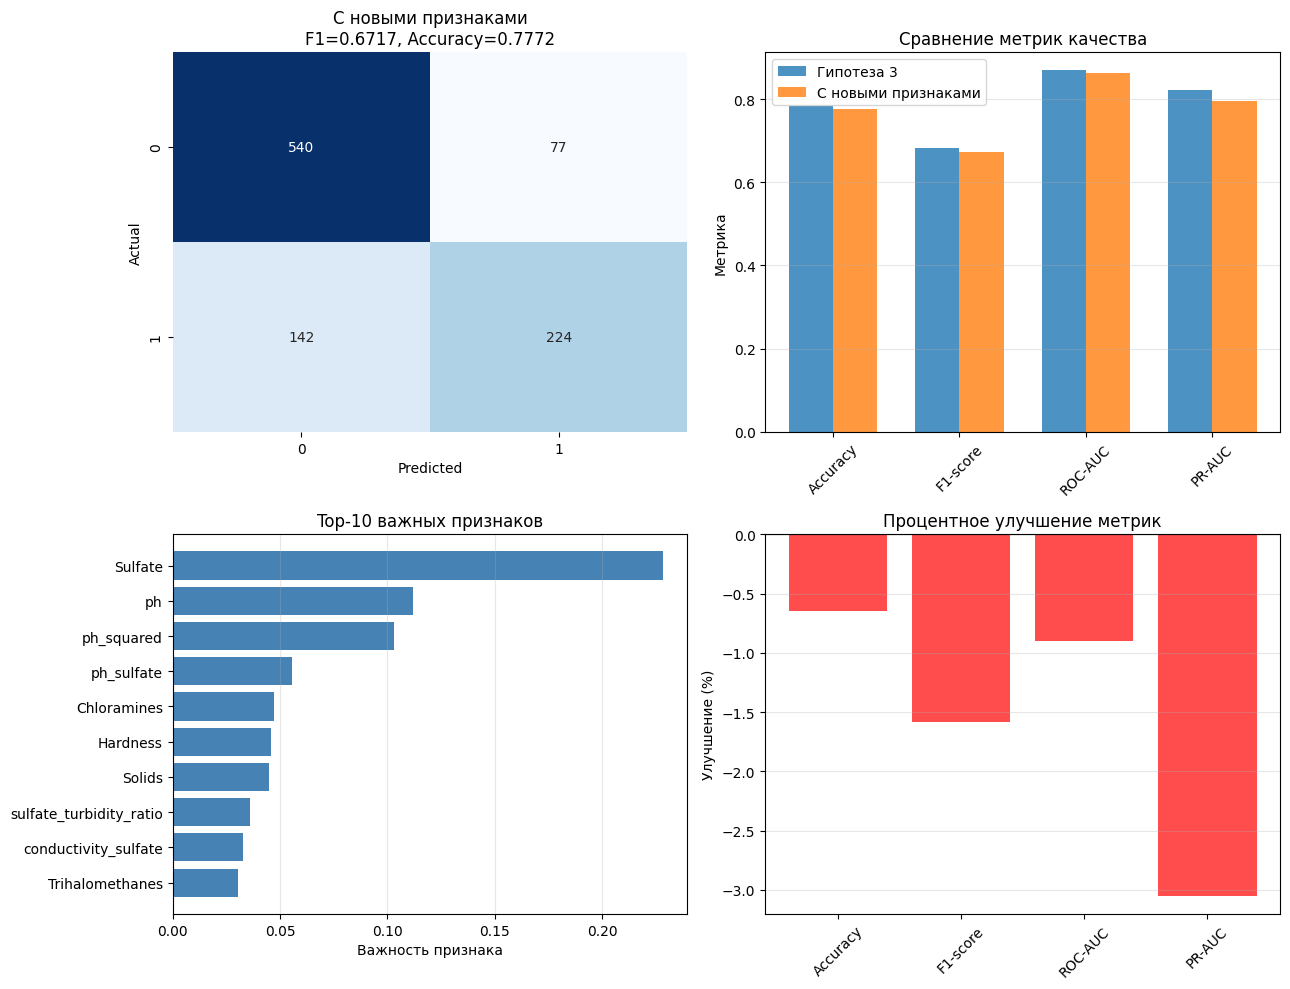

In [ ]:
# визуализация результатов с новыми признаками
fig, axes = plt.subplots(2, 2, figsize=(13, 10))

# матрица ошибок для модели с новыми признаками
cm_fe = confusion_matrix(y_test_water_fe, y_pred_water_fe)
sns.heatmap(cm_fe, annot=True, fmt='d', ax=axes[0, 0], cmap='Blues', cbar=False)
axes[0, 0].set_title(f'С новыми признаками\nF1={f1_fe:.4f}, Accuracy={acc_fe:.4f}')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

# сравнение метрик
metrics_names = ['Accuracy', 'F1-score', 'ROC-AUC', 'PR-AUC']
hyp3_metrics = [acc_h3, f1_h3, roc_auc_h3, pr_auc_h3]
fe_metrics = [acc_fe, f1_fe, roc_auc_fe, pr_auc_fe]

x = np.arange(len(metrics_names))
width = 0.35

axes[0, 1].bar(x - width/2, hyp3_metrics, width, label='Гипотеза 3', alpha=0.8)
axes[0, 1].bar(x + width/2, fe_metrics, width, label='С новыми признаками', alpha=0.8)
axes[0, 1].set_ylabel('Метрика')
axes[0, 1].set_title('Сравнение метрик качества')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(metrics_names, rotation=45)
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3, axis='y')

# важность признаков
feature_importance = rf_clf_fe.feature_importances_
top_indices = np.argsort(feature_importance)[-10:]
top_features = [X_water_fe_extended.columns[i] for i in top_indices]
top_importance = feature_importance[top_indices]

axes[1, 0].barh(top_features, top_importance, color='steelblue')
axes[1, 0].set_xlabel('Важность признака')
axes[1, 0].set_title('Top-10 важных признаков')
axes[1, 0].grid(alpha=0.3, axis='x')

# увеличение метрик
improvement = [(fe_metrics[i] - hyp3_metrics[i]) / hyp3_metrics[i] * 100 
               for i in range(len(metrics_names))]
colors = ['green' if x > 0 else 'red' for x in improvement]
axes[1, 1].bar(metrics_names, improvement, color=colors, alpha=0.7)
axes[1, 1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[1, 1].set_ylabel('Улучшение (%)')
axes[1, 1].set_title('Процентное улучшение метрик')
axes[1, 1].set_xticklabels(metrics_names, rotation=45)
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

*Создание новых признаков не улучшило метрики модели случайного леса для классификации.*

Создание новых признаков для задачи регрессии

In [ ]:
# загрузим данные заново для создания новых признаков
df_concrete_fe = pd.read_csv('concrete.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'])

# отделяем признаки и целевую переменную
X_concrete_fe = df_concrete_fe.iloc[:, :-1]
y_concrete_fe = df_concrete_fe.iloc[:, -1]

# создание новых признаков
X_concrete_fe_extended = X_concrete_fe.copy()

# взаимодействие признаков (основные компоненты смеси)
X_concrete_fe_extended['cement_water'] = X_concrete_fe_extended['cement'] * X_concrete_fe_extended['water']
X_concrete_fe_extended['cement_slag'] = X_concrete_fe_extended['cement'] * X_concrete_fe_extended['slag']
X_concrete_fe_extended['cement_ash'] = X_concrete_fe_extended['cement'] * X_concrete_fe_extended['flyash']
X_concrete_fe_extended['slag_ash'] = X_concrete_fe_extended['slag'] * X_concrete_fe_extended['flyash']
X_concrete_fe_extended['water_superplasticizer'] = X_concrete_fe_extended['water'] * X_concrete_fe_extended['superplasticizer']
# полиномиальные признаки
X_concrete_fe_extended['cement_squared'] = X_concrete_fe_extended['cement'] ** 2
X_concrete_fe_extended['water_squared'] = X_concrete_fe_extended['water'] ** 2
X_concrete_fe_extended['slag_squared'] = X_concrete_fe_extended['slag'] ** 2
X_concrete_fe_extended['age_squared'] = X_concrete_fe_extended['age'] ** 2
X_concrete_fe_extended['age_cubed'] = X_concrete_fe_extended['age'] ** 3

# отношения между признаками
X_concrete_fe_extended['cement_water_ratio'] = X_concrete_fe_extended['cement'] / (X_concrete_fe_extended['water'] + 1e-6)
X_concrete_fe_extended['total_binders'] = (X_concrete_fe_extended['cement'] + 
                                            X_concrete_fe_extended['slag'] + 
                                            X_concrete_fe_extended['flyash'])
X_concrete_fe_extended['binder_water_ratio'] = X_concrete_fe_extended['total_binders'] / (X_concrete_fe_extended['water'] + 1e-6)

# статистические признаки
X_concrete_fe_extended['component_mean'] = X_concrete_fe_extended[['cement', 'slag', 'flyash', 'water']].mean(axis=1)
X_concrete_fe_extended['component_max'] = X_concrete_fe_extended[['cement', 'slag', 'flyash', 'water']].max(axis=1)

print(f"Исходное количество признаков: {X_concrete_fe.shape[1]}")
print(f"Количество признаков после добавления: {X_concrete_fe_extended.shape[1]}")
print(f"\nНовые признаки: {list(X_concrete_fe_extended.columns[X_concrete_fe.shape[1]:])}")

Исходное количество признаков: 8
Количество признаков после добавления: 23

Новые признаки: ['cement_water', 'cement_slag', 'cement_ash', 'slag_ash', 'water_superplasticizer', 'cement_squared', 'water_squared', 'slag_squared', 'age_squared', 'age_cubed', 'cement_water_ratio', 'total_binders', 'binder_water_ratio', 'component_mean', 'component_max']


Обучение модели с новыми признаками

In [69]:
# разделение на train/test с новыми признаками
X_train_concrete_fe, X_test_concrete_fe, y_train_concrete_fe, y_test_concrete_fe = train_test_split(
    X_concrete_fe_extended, y_concrete_fe, test_size=0.3, random_state=42
)

# обучение случайного леса с новыми признаками
rf_reg_fe = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg_fe.fit(X_train_concrete_fe, y_train_concrete_fe)
y_pred_concrete_fe = rf_reg_fe.predict(X_test_concrete_fe)

# вычисление метрик
mae_fe = mean_absolute_error(y_test_concrete_fe, y_pred_concrete_fe)
rmse_fe = np.sqrt(mean_squared_error(y_test_concrete_fe, y_pred_concrete_fe))
mse_fe = mean_squared_error(y_test_concrete_fe, y_pred_concrete_fe)
r2_fe = r2_score(y_test_concrete_fe, y_pred_concrete_fe)

print(f"Метрики качества (с новыми признаками):")
print(f"  MAE:   {mae_fe:.4f}")
print(f"  RMSE:  {rmse_fe:.4f}")
print(f"  MSE:   {mse_fe:.4f}")
print(f"  R²:    {r2_fe:.4f}")

print(f"\nМетрики качества (Гипотеза 3):")
print(f"  MAE:   {mae_h3:.4f}")
print(f"  RMSE:  {rmse_h3:.4f}")
print(f"  MSE:   {mse_h3:.4f}")
print(f"  R²:    {r2_h3:.4f}")

Метрики качества (с новыми признаками):
  MAE:   3.3975
  RMSE:  5.0226
  MSE:   25.2269
  R²:    0.9068

Метрики качества (Гипотеза 3):
  MAE:   3.7400
  RMSE:  5.5011
  MSE:   30.2619
  R²:    0.8882


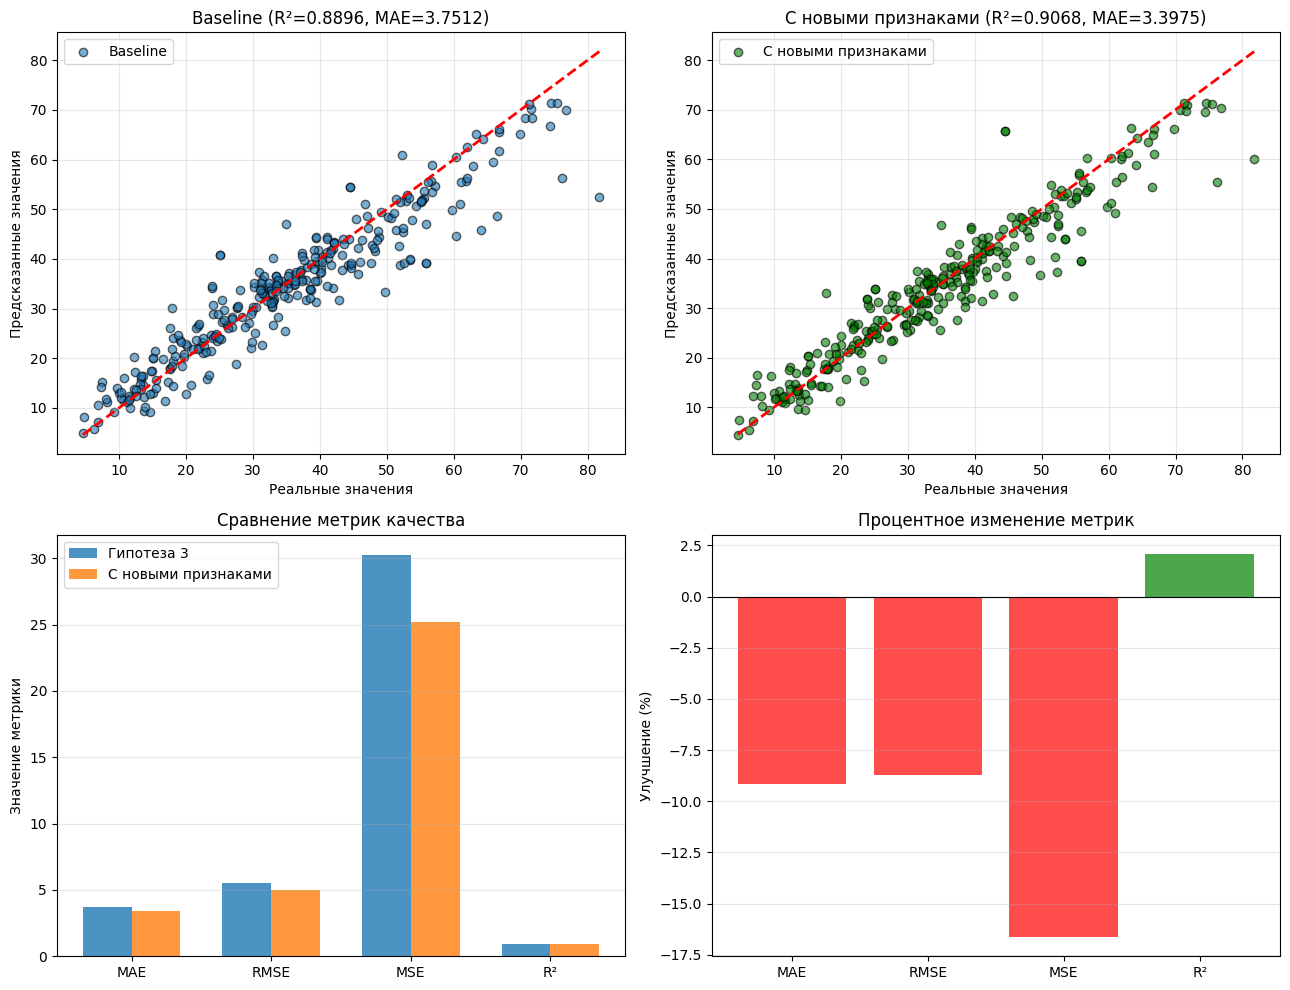

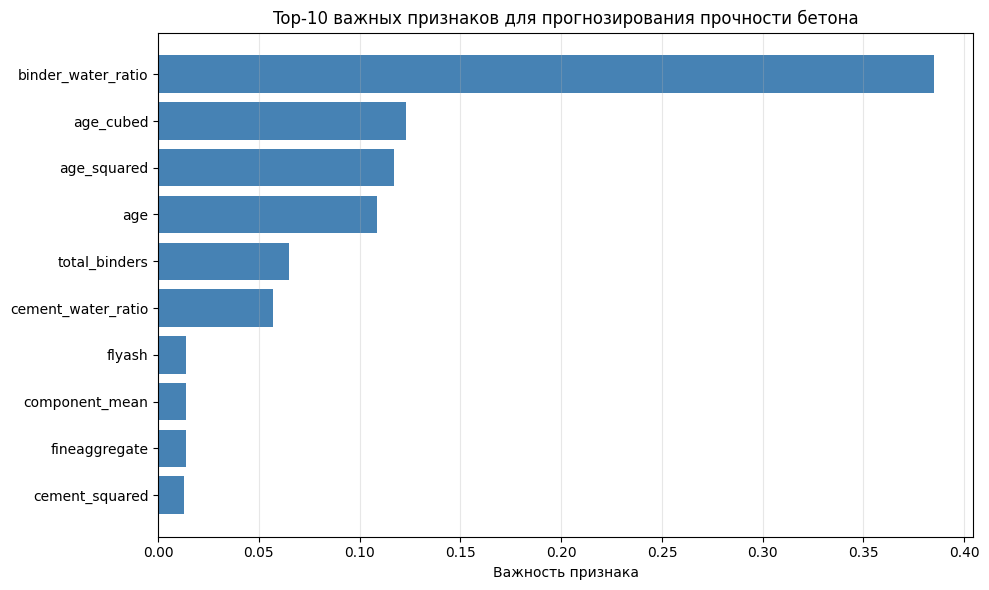

In [ ]:
# визуализация результатов создания признаков для регрессии
fig, axes = plt.subplots(2, 2, figsize=(13, 10))

# график предсказаний vs реальные значения (baseline)
axes[0, 0].scatter(y_test_concrete, y_pred_concrete_baseline, alpha=0.6, edgecolors='k', label='Baseline')
axes[0, 0].plot([y_test_concrete.min(), y_test_concrete.max()], 
                [y_test_concrete.min(), y_test_concrete.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Реальные значения')
axes[0, 0].set_ylabel('Предсказанные значения')
axes[0, 0].set_title(f'Baseline (R²={r2:.4f}, MAE={mae:.4f})')
axes[0, 0].grid(alpha=0.3)
axes[0, 0].legend()

# график предсказаний vs реальные значения (с инженерией)
axes[0, 1].scatter(y_test_concrete_fe, y_pred_concrete_fe, alpha=0.6, edgecolors='k', color='green', label='С новыми признаками')
axes[0, 1].plot([y_test_concrete_fe.min(), y_test_concrete_fe.max()], 
                [y_test_concrete_fe.min(), y_test_concrete_fe.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Реальные значения')
axes[0, 1].set_ylabel('Предсказанные значения')
axes[0, 1].set_title(f'С новыми признаками (R²={r2_fe:.4f}, MAE={mae_fe:.4f})')
axes[0, 1].grid(alpha=0.3)
axes[0, 1].legend()

# сравнение метрик
metrics_names = ['MAE', 'RMSE', 'MSE', 'R²']
hyp3_reg_metrics = [mae_h3, rmse_h3, mse_h3, r2_h3]
fe_metrics = [mae_fe, rmse_fe, mse_fe, r2_fe]

x = np.arange(len(metrics_names))
width = 0.35

axes[1, 0].bar(x - width / 2, hyp3_reg_metrics, width, label='Гипотеза 3', alpha=0.8)
axes[1, 0].bar(x + width / 2, fe_metrics, width, label='С новыми признаками', alpha=0.8)
axes[1, 0].set_ylabel('Значение метрики')
axes[1, 0].set_title('Сравнение метрик качества')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(metrics_names)
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3, axis='y')

# процентное улучшение метрик
improvement = [((fe_metrics[i] - hyp3_reg_metrics[i]) / hyp3_reg_metrics[i] * 100) 
               if hyp3_reg_metrics[i] != 0 else 0 for i in range(len(metrics_names))]
colors = ['green' if x > 0 else 'red' for x in improvement]
axes[1, 1].bar(metrics_names, improvement, color=colors, alpha=0.7)
axes[1, 1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[1, 1].set_ylabel('Улучшение (%)')
axes[1, 1].set_title('Процентное изменение метрик')
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Важность признаков
feature_importance_reg = rf_reg_fe.feature_importances_
top_indices_reg = np.argsort(feature_importance_reg)[-10:]
top_features_reg = [X_concrete_fe_extended.columns[i] for i in top_indices_reg]
top_importance_reg = feature_importance_reg[top_indices_reg]

plt.figure(figsize=(10, 6))
plt.barh(top_features_reg, top_importance_reg, color='steelblue')
plt.xlabel('Важность признака')
plt.title('Top-10 важных признаков для прогнозирования прочности бетона')
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

*Создание новых признаков заметно улучшило метрики качества модели регрессии для случайного леса.*

### 3c-f. Формирование улучшенного бейзлайна

Выведем метрики для базовых и улучшенных моделей классификации и регрессии.

In [22]:
print("Метрики классификации:")
print(f"baseline:   Accuracy={accuracy:.4f}, F1={f1:.4f}, ROC-AUC={roc_auc:.4f}, PR-AUC={pr_auc:.4f}")
print(f"Гипотеза 1: Accuracy={acc_h1:.4f}, F1={f1_h1:.4f}, ROC-AUC={roc_auc_h1:.4f}, PR-AUC={pr_auc_h1:.4f}")
print(f"Гипотеза 5: Accuracy={acc_fe:.4f}, F1={f1_fe:.4f}, ROC-AUC={roc_auc_fe:.4f}, PR-AUC={pr_auc_fe:.4f}")
print(f"Гипотеза 4: Accuracy={acc_h4:.4f}, F1={f1_h4:.4f}, ROC-AUC={roc_auc_h4:.4f}, PR-AUC={pr_auc_h4:.4f}")
print(f"Гипотеза 2: Accuracy={acc_h2:.4f}, F1={f1_h2:.4f}, ROC-AUC={roc_auc_h2:.4f}, PR-AUC={pr_auc_h2:.4f}")
print(f"Гипотеза 3: Accuracy={acc_h3:.4f}, F1={f1_h3:.4f}, ROC-AUC={roc_auc_h3:.4f}, PR-AUC={pr_auc_h3:.4f}")

print("\nМетрики регрессии:")
print(f"baseline:    MAE={mae:.4f}, R²={r2:.4f}, MSE={mse:.4f}")
print(f"Гипотеза 1:  MAE={mae_h1:.4f}, R²={r2_h1:.4f}, MSE={mse_h1:.4f}")
print(f"Гипотеза 5:  MAE={mae_fe:.4f}, R²={r2_fe:.4f}, MSE={mse_fe:.4f}")
print(f"Гипотеза 4:  MAE={mae_h4:.4f}, R²={r2_h4:.4f}, MSE={mse_h4:.4f}")
print(f"Гипотеза 2:  MAE={mae_h2:.4f}, R²={r2_h2:.4f}, MSE={mse_h2:.4f}")
print(f"Гипотеза 3:  MAE={mae_h3:.4f}, R²={r2_h3:.4f}, MSE={mse_h3:.4f}")

Метрики классификации:
baseline:   Accuracy=0.6705, F1=0.5111, ROC-AUC=0.6901, PR-AUC=0.6243
Гипотеза 1: Accuracy=0.7864, F1=0.6645, ROC-AUC=0.8692, PR-AUC=0.8124
Гипотеза 5: Accuracy=0.7772, F1=0.6717, ROC-AUC=0.8617, PR-AUC=0.7958
Гипотеза 4: Accuracy=0.7792, F1=0.6646, ROC-AUC=0.8609, PR-AUC=0.8067
Гипотеза 2: Accuracy=0.7864, F1=0.6645, ROC-AUC=0.8692, PR-AUC=0.8124
Гипотеза 3: Accuracy=0.7823, F1=0.6825, ROC-AUC=0.8695, PR-AUC=0.8209

Метрики регрессии:
baseline:    MAE=3.7512, R²=0.8896, MSE=29.8643
Гипотеза 1:  MAE=3.7512, R²=0.8896, MSE=29.8643
Гипотеза 5:  MAE=3.3975, R²=0.9068, MSE=25.2269
Гипотеза 4:  MAE=3.9019, R²=0.8870, MSE=30.5638
Гипотеза 2:  MAE=3.7608, R²=0.8891, MSE=30.0114
Гипотеза 3:  MAE=3.7400, R²=0.8882, MSE=30.2619


### 3g. Выводы

Проанализировав различные гипотезы для улучшения качества моделей случайного леса, можно сделать следующие выводы:

**Для классификации:**

Заполнение пропусков медианой улучшило метрики модели. Стандартизация признаков не дала значительного эффекта, так как деревья решений не чувствительны к масштабу. Подбор гиперпараметров может дать улучшения, но незначительное. Создание новых признаков не привело к улучшению качества модели классификации. Удаление выбросов ухудшило метрики модели, это говорит о том, что порог отсечения выбросов был выбран неудачно или выбросы содержали полезную информацию.

Улучшение: гипотезы 1 + 3

**Для регрессии:**

Базовая модель случайного леса уже показывает хорошие результаты. Заполнение пропусков не повлияло на качество, так как их  нет в датасете. Стандартизация также не дала эффекта. Удаление выбросов ухудшило результат, значит выбросы содержали полезную информацию. Создание новых признаков значительно улучшило все метрики модели регрессии.

Улучшение: гипотезы 3 + 5

## 4. Имплементация алгоритма случайного леса

### 4a. Реализация алгоритма

Реализация алгоритма случайного леса для классификации

Для начала используем уже реализованное дерево решений из предыдущей лабораторной работы.

In [ ]:
class TreeNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, class_probs=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.class_probs = class_probs

class DecisionTreeClassifierCustom:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                 class_weight=None, max_features=None, n_total_features=None):
        self.max_depth = max_depth # максимальная глубина дерева
        self.min_samples_split = min_samples_split # мин. число образцов для разбиения узла
        self.min_samples_leaf = min_samples_leaf # мин. число образцов в листовом узле
        self.class_weight = class_weight # веса классов для балансировки
        self.max_features = max_features  # число признаков для выбора на узел
        self.n_total_features = n_total_features  # общее число признаков (нужно для выбора)

    def _compute_sample_weights(self, y):
        """ Вычисляет веса образцов на основе class_weight. """
        if self.class_weight is None:
            return np.ones(len(y))
        classes, counts = np.unique(y, return_counts=True)
        n_samples = len(y)
        n_classes = len(classes)
        if self.class_weight == "balanced":
            class_weights = {
                cls: n_samples / (n_classes * count)
                for cls, count in zip(classes, counts)
            }
        elif isinstance(self.class_weight, dict):
            class_weights = self.class_weight
        else:
            raise ValueError("class_weight must be None, 'balanced', or a dict")
        return np.array([class_weights.get(label, 1.0) for label in y])

    def _gini_weighted(self, y, sample_weights):
        total_weight = np.sum(sample_weights)
        if total_weight == 0 or len(y) == 0:
            return 0.0
        weighted_counts = np.bincount(y, weights=sample_weights, minlength=self.n_classes)
        probs = weighted_counts / total_weight
        return 1.0 - np.sum(probs ** 2)

    def _best_split(self, X, y, sample_weights):
        """ Находит лучший признак и порог для разбиения. """
        best_gain = -1
        best_feat, best_thr = None, None
        total_weight = np.sum(sample_weights)
        parent_gini = self._gini_weighted(y, sample_weights)

        # выбор случайного подмножества признаков на узле
        if self.max_features is not None and self.n_total_features is not None:
            feature_indices = np.random.choice(
                self.n_total_features, size=self.max_features, replace=False
            )
        else:
            feature_indices = range(X.shape[1]) # все признаки

        for feat in feature_indices:
            thresholds = np.unique(X[:, feat]) # выбор порогов по уникальным значениям признака

            for thr in thresholds: # перебор порогов
                left_mask = X[:, feat] <= thr
                right_mask = ~left_mask

                w_left = np.sum(sample_weights[left_mask])
                w_right = np.sum(sample_weights[right_mask])

                if (w_left < self.min_samples_leaf or 
                    w_right < self.min_samples_leaf or
                    w_left + w_right < self.min_samples_split):
                    continue

                gini_left = self._gini_weighted(y[left_mask], sample_weights[left_mask])
                gini_right = self._gini_weighted(y[right_mask], sample_weights[right_mask])
                weighted_gini = (w_left * gini_left + w_right * gini_right) / total_weight
                gain = parent_gini - weighted_gini

                if gain > best_gain:
                    best_gain, best_feat, best_thr = gain, feat, thr
        return best_feat, best_thr

    def _build_tree(self, X, y, sample_weights, depth=0):
        """ Рекурсивно строит дерево решений. """
        total_weight = np.sum(sample_weights)
        if (
            total_weight < self.min_samples_split or
            len(np.unique(y)) == 1 or
            (self.max_depth is not None and depth >= self.max_depth)
        ):
            weighted_counts = np.bincount(y, weights=sample_weights, minlength=self.n_classes)
            probs = weighted_counts / total_weight if total_weight > 0 else np.ones(self.n_classes) / self.n_classes
            return TreeNode(class_probs=probs)

        feat, thr = self._best_split(X, y, sample_weights)
        if feat is None:
            weighted_counts = np.bincount(y, weights=sample_weights, minlength=self.n_classes)
            probs = weighted_counts / total_weight if total_weight > 0 else np.ones(self.n_classes) / self.n_classes
            return TreeNode(class_probs=probs)

        left_mask = X[:, feat] <= thr
        left_subtree = self._build_tree(
            X[left_mask], y[left_mask], sample_weights[left_mask], depth + 1
        )
        right_subtree = self._build_tree(
            X[~left_mask], y[~left_mask], sample_weights[~left_mask], depth + 1
        )
        return TreeNode(feature=feat, threshold=thr, left=left_subtree, right=right_subtree)

    def fit(self, X, y):
        X, y = np.asarray(X), np.asarray(y)
        self.classes_ = np.unique(y)
        self.n_classes = len(self.classes_)
        self.sample_weights_ = self._compute_sample_weights(y)
        # запоминаем общее число признаков
        if self.n_total_features is None:
            self.n_total_features = X.shape[1]
        self.tree_ = self._build_tree(X, y, self.sample_weights_)
        return self

    def _predict_sample(self, x, node):
        if node.class_probs is not None:
            return np.argmax(node.class_probs)
        if x[node.feature] <= node.threshold:
            return self._predict_sample(x, node.left)
        else:
            return self._predict_sample(x, node.right)

    def _predict_proba_sample(self, x, node):
        if node.class_probs is not None:
            return node.class_probs
        if x[node.feature] <= node.threshold:
            return self._predict_proba_sample(x, node.left)
        else:
            return self._predict_proba_sample(x, node.right)

    def predict(self, X):
        """ Предсказывает классы для каждого образца. """
        X = np.asarray(X)
        return np.array([self._predict_sample(x, self.tree_) for x in X])

    def predict_proba(self, X):
        """ Предсказывает вероятности классов для каждого образца. """
        X = np.asarray(X)
        return np.array([self._predict_proba_sample(x, self.tree_) for x in X])

Реализация алгоритма случайного леса для регрессии

Возьмем за основу реализацию дерева решений для регрессии из предыдущей лабораторной работы.

In [ ]:
class TreeNodeReg:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature # индекс признака для сплита
        self.threshold = threshold # порог
        self.left = left # левое поддерево
        self.right = right # правое поддерево
        self.value = value # предсказываемое значение (среднее y в листе)

class DecisionTreeRegressorCustom:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf

    def _best_split(self, X, y):
        """ Нахождение лучшего сплита с использованием отсортированных значений и накопленных сумм. """
        best_reduction = -1
        best_feat, best_thr = None, None
        n_samples = len(y)
        
        # общий SSE (sum of squared errors) = sum((y - mean)^2) = sum(y^2) - (sum(y))^2 / n
        total_sum = np.sum(y)
        total_sum2 = np.sum(y ** 2)
        parent_sse = total_sum2 - (total_sum ** 2) / n_samples if n_samples > 0 else 0.0

        for feat in range(X.shape[1]):
            # сортируем по текущему признаку
            indices = np.argsort(X[:, feat])
            X_sorted = X[indices, feat]
            y_sorted = y[indices]

            # пропускаем признак, если все значения одинаковы
            if X_sorted[0] == X_sorted[-1]:
                continue

            # накопленные суммы
            cumsum_y = np.cumsum(y_sorted)
            cumsum_y2 = np.cumsum(y_sorted ** 2)

            # перебираем возможные границы между объектами
            for i in range(1, n_samples):
                # пропускаем, если нет разрыва в значениях (избегаем дублирующих порогов)
                if X_sorted[i] == X_sorted[i - 1]:
                    continue

                n_left = i
                n_right = n_samples - i

                if n_left < self.min_samples_leaf or n_right < self.min_samples_leaf:
                    continue

                # SSE для левой части
                sum_left = cumsum_y[i - 1]
                sum2_left = cumsum_y2[i - 1]
                sse_left = sum2_left - (sum_left ** 2) / n_left

                # SSE для правой части
                sum_right = total_sum - sum_left
                sum2_right = total_sum2 - sum2_left
                sse_right = sum2_right - (sum_right ** 2) / n_right

                total_sse = sse_left + sse_right
                reduction = parent_sse - total_sse

                if reduction > best_reduction:
                    best_reduction = reduction
                    best_feat = feat
                    best_thr = (X_sorted[i - 1] + X_sorted[i]) / 2.0  # порог между

        return best_feat, best_thr

    def _build_tree(self, X, y, depth=0):
        n_samples = len(y)

        # условия остановки
        if (
            n_samples < self.min_samples_split or
            (self.max_depth is not None and depth >= self.max_depth) or
            np.allclose(y, y[0])  # все значения y почти одинаковы
        ):
            return TreeNodeReg(value=np.mean(y))

        feat, thr = self._best_split(X, y)
        if feat is None:
            return TreeNodeReg(value=np.mean(y))

        left_mask = X[:, feat] <= thr
        left_subtree = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self._build_tree(X[~left_mask], y[~left_mask], depth + 1)

        return TreeNodeReg(feature=feat, threshold=thr, left=left_subtree, right=right_subtree)

    def fit(self, X, y):
        X, y = np.asarray(X), np.asarray(y)
        self.tree_ = self._build_tree(X, y)
        return self

    def _predict_sample(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self._predict_sample(x, node.left)
        else:
            return self._predict_sample(x, node.right)

    def predict(self, X):
        X = np.asarray(X)
        return np.array([self._predict_sample(x, self.tree_) for x in X])

Реализуем случайный лес для классификации

In [72]:
class RandomForestClassifierCustom:
    def __init__(self, n_estimators=10, max_depth=None, min_samples_split=2, 
                 min_samples_leaf=1, max_features='sqrt', class_weight=None, random_state=None):
        self.n_estimators = n_estimators # число деревьев
        self.max_depth = max_depth # максимальная глубина дерева
        self.min_samples_split = min_samples_split # мин. число образцов для сплита
        self.min_samples_leaf = min_samples_leaf # мин. число образцов в листе
        self.max_features = max_features # число признаков для выбора на узел
        self.class_weight = class_weight # веса классов
        if random_state is not None:
            np.random.seed(random_state)

    def fit(self, X, y):
        X, y = np.asarray(X), np.asarray(y)
        self.n_samples_, self.n_features_ = X.shape
        self.classes_ = np.unique(y)
        self.n_classes_ = len(self.classes_)

        # определяем число признаков для выбора НА КАЖДОМ УЗЛЕ
        if self.max_features == 'sqrt':
            self.n_features_per_node = int(np.sqrt(self.n_features_))
        elif self.max_features == 'log2':
            self.n_features_per_node = int(np.log2(self.n_features_))
        elif isinstance(self.max_features, int):
            self.n_features_per_node = min(self.max_features, self.n_features_)
        else:
            self.n_features_per_node = self.n_features_

        self.trees_ = []

        for _ in range(self.n_estimators):
            # bootstrap выборка
            bootstrap_idx = np.random.choice(self.n_samples_, size=self.n_samples_, replace=True)
            X_boot, y_boot = X[bootstrap_idx], y[bootstrap_idx]

            # обучаем дерево на всех признаках, но с ограничением на узел
            tree = DecisionTreeClassifierCustom(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf,
                class_weight=self.class_weight,
                max_features=self.n_features_per_node,
                n_total_features=self.n_features_
            )
            tree.fit(X_boot, y_boot)  # передаём полный X_boot, а не подмножество!

            self.trees_.append(tree)

        return self

    def predict(self, X):
        X = np.asarray(X)
        all_preds = np.array([tree.predict(X) for tree in self.trees_])
        y_pred = []
        for i in range(X.shape[0]):
            votes = all_preds[:, i]
            values, counts = np.unique(votes, return_counts=True)
            y_pred.append(values[np.argmax(counts)])
        return np.array(y_pred)

    def predict_proba(self, X):
        X = np.asarray(X)
        all_probas = np.array([tree.predict_proba(X) for tree in self.trees_])
        return np.mean(all_probas, axis=0)

Реализация алгоритма случайного леса для регрессии

In [ ]:
class RandomForestRegressorCustom:
    def __init__(self, n_estimators=10, max_depth=None, min_samples_split=2, 
                 min_samples_leaf=1, max_features=None, random_state=None):
        self.n_estimators = n_estimators # число деревьев в лесу
        self.max_depth = max_depth # максимальная глубина дерева
        self.min_samples_split = min_samples_split # число минимальных образцов для сплита
        self.min_samples_leaf = min_samples_leaf # число минимальных образцов в листе
        self.max_features = max_features # число признаков на дерево
        if random_state is not None:
            np.random.seed(random_state)

    def fit(self, X, y):
        X, y = np.asarray(X), np.asarray(y)
        self.n_samples_, self.n_features_ = X.shape

        # определяем число признаков на дерево
        if self.max_features == 'sqrt':
            self.n_features_per_tree = int(np.sqrt(self.n_features_))
        elif self.max_features == 'log2':
            self.n_features_per_tree = int(np.log2(self.n_features_))
        elif isinstance(self.max_features, int):
            self.n_features_per_tree = min(self.max_features, self.n_features_)
        else:
            self.n_features_per_tree = self.n_features_

        self.trees_ = []
        self.feature_subsets_ = []

        for _ in range(self.n_estimators):
            # bootstrap выборка
            bootstrap_idx = np.random.choice(self.n_samples_, size=self.n_samples_, replace=True)
            X_boot, y_boot = X[bootstrap_idx], y[bootstrap_idx]

            # случайный выбор признаков на всё дерево
            feature_subset = np.random.choice(self.n_features_, size=self.n_features_per_tree, replace=False)
            X_boot_subset = X_boot[:, feature_subset]

            # обучаем дерево
            tree = DecisionTreeRegressorCustom(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf
            )
            tree.fit(X_boot_subset, y_boot)

            self.trees_.append(tree)
            self.feature_subsets_.append(feature_subset)

        return self

    def predict(self, X):
        X = np.asarray(X)
        # собираем предсказания от всех деревьев
        all_preds = np.array([
            tree.predict(X[:, features])
            for tree, features in zip(self.trees_, self.feature_subsets_)
        ])  # shape: (n_estimators, n_samples)
        # усредняем
        return np.mean(all_preds, axis=0)

### 4b. Проверка собственной реализации на сырых данных

Проверим модель классификации на сырых данных и сравним с реализацией из sklearn.

In [ ]:
df_water = pd.read_csv('water_potability.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'], index_col=0)

# удаление строк с пропусками для baseline
df_water_cu = df_water.dropna()

# разделяем на признаки и целевую переменную
X_water_cu = df_water_cu.drop('Potability', axis=1)
y_water_cu = df_water_cu['Potability']

# разделение на train/test
X_train_water_cu, X_test_water_cu, y_train_water_cu, y_test_water_cu = train_test_split(
    X_water_cu, y_water_cu, test_size=0.3, random_state=42
)

# обучение собственной реализации на baseline данных
rm_custom_clf_baseline = RandomForestClassifierCustom(n_estimators=100, random_state=42, class_weight='balanced', max_features=2)
rm_custom_clf_baseline.fit(X_train_water_cu, y_train_water_cu)
y_pred_custom_clf_baseline = rm_custom_clf_baseline.predict(X_test_water_cu.values)
y_pred_proba_clf_baseline = rm_custom_clf_baseline.predict_proba(X_test_water_cu.values)[:, 1]

rm_sklearn_clf_baseline = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rm_sklearn_clf_baseline.fit(X_train_water_cu, y_train_water_cu)
y_pred_sklearn_clf_baseline = rm_sklearn_clf_baseline.predict(X_test_water_cu)
y_pred_proba_sklearn_baseline = rm_sklearn_clf_baseline.predict_proba(X_test_water_cu)[:, 1]

# метрики для классификации
acc_custom_baseline = accuracy_score(y_test_water_cu, y_pred_custom_clf_baseline)
f1_custom_baseline = f1_score(y_test_water_cu, y_pred_custom_clf_baseline, zero_division=0)
roc_auc_custom_baseline = roc_auc_score(y_test_water_cu, y_pred_custom_clf_baseline)
precision_custom, recall_custom, _ = precision_recall_curve(y_test_water_cu, y_pred_proba_clf_baseline)
pr_auc_custom_baseline = auc(recall_custom, precision_custom)

acc_sklearn_baseline = accuracy_score(y_test_water_cu, y_pred_sklearn_clf_baseline)
f1_sklearn_baseline = f1_score(y_test_water_cu, y_pred_sklearn_clf_baseline, zero_division=0)
roc_auc_sklearn_baseline = roc_auc_score(y_test_water_cu, y_pred_sklearn_clf_baseline)
precision_sklearn, recall_sklearn, _ = precision_recall_curve(y_test_water_cu, y_pred_proba_sklearn_baseline)
pr_auc_sklearn_baseline = auc(recall_sklearn, precision_sklearn)

print("Классификация (собственная реализация - baseline):")
print(f"  Accuracy:  {acc_custom_baseline:.4f}")
print(f"  F1-score:  {f1_custom_baseline:.4f}")
print(f"  ROC-AUC:   {roc_auc_custom_baseline:.4f}")
print(f"  PR-AUC:    {pr_auc_custom_baseline:.4f}")

print("\nКлассификация (sklearn реализация - baseline):")
print(f"  Accuracy:  {acc_sklearn_baseline:.4f}")
print(f"  F1-score:  {f1_sklearn_baseline:.4f}")
print(f"  ROC-AUC:   {roc_auc_sklearn_baseline:.4f}")
print(f"  PR-AUC:    {pr_auc_sklearn_baseline:.4f}")

Классификация (собственная реализация - baseline):
  Accuracy:  0.6507
  F1-score:  0.5342
  ROC-AUC:   0.6261
  PR-AUC:    0.6172

Классификация (sklearn реализация - baseline):
  Accuracy:  0.6705
  F1-score:  0.5111
  ROC-AUC:   0.6328
  PR-AUC:    0.6243


*Метрики практически совпали, значит реализация работает корректно.*

Проверим собственную реализацию случайного леса для регрессии на сырых данных и сравним с реализацией из sklearn.

In [66]:
df_concrete_cu = pd.read_csv('concrete.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'])

X_concrete_cu = df_concrete_cu.iloc[:, :-1]
y_concrete_cu = df_concrete_cu.iloc[:, -1]

X_train_concrete, X_test_concrete, y_train_concrete, y_test_concrete = train_test_split(
    X_concrete_cu, y_concrete_cu, test_size=0.3, random_state=42
)

rm_custom_reg_baseline = RandomForestRegressorCustom(n_estimators=100)
rm_custom_reg_baseline.fit(X_train_concrete.values, y_train_concrete.values)
y_pred_custom_reg_baseline = rm_custom_reg_baseline.predict(X_test_concrete.values)

rm_sklearn_reg_baseline = RandomForestRegressor(n_estimators=100, random_state=42)
rm_sklearn_reg_baseline.fit(X_train_concrete, y_train_concrete)
y_pred_sklearn_reg_baseline = rm_sklearn_reg_baseline.predict(X_test_concrete)

# Метрики для регрессии
mae_custom_baseline = mean_absolute_error(y_test_concrete, y_pred_custom_reg_baseline)
r2_custom_baseline = r2_score(y_test_concrete, y_pred_custom_reg_baseline)
mse_custom_baseline = mean_squared_error(y_test_concrete, y_pred_custom_reg_baseline)

mae_sklearn_baseline = mean_absolute_error(y_test_concrete, y_pred_sklearn_reg_baseline)
r2_sklearn_baseline = r2_score(y_test_concrete, y_pred_sklearn_reg_baseline)
mse_sklearn_baseline = mean_squared_error(y_test_concrete, y_pred_sklearn_reg_baseline)

print("\nРегрессия (собственная реализация - baseline):")
print(f"  MAE:  {mae_custom_baseline:.4f}")
print(f"  R²:   {r2_custom_baseline:.4f}")
print(f"  MSE:  {mse_custom_baseline:.4f}")

print("\nРегрессия (sklearn реализация - baseline):")
print(f"  MAE:  {mae_sklearn_baseline:.4f}")
print(f"  R²:   {r2_sklearn_baseline:.4f}")
print(f"  MSE:  {mse_sklearn_baseline:.4f}")


Регрессия (собственная реализация - baseline):
  MAE:  3.8221
  R²:   0.8829
  MSE:  31.6829

Регрессия (sklearn реализация - baseline):
  MAE:  3.7512
  R²:   0.8896
  MSE:  29.8643


*Метрики почти совпали, значит реализация правильная.*

### 4с. Проверка собственной реализации на улучшенных данных

Проверим собственную реализацию случайного леса для классификации на улучшенных данных и сравним с реализацией из sklearn.

In [ ]:
df_water_improved = pd.read_csv('water_potability.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'], index_col=0)

# замена пропусков на медиану по классам
df_water_improved['ph'] = df_water_improved.groupby('Potability')['ph'].transform(lambda x: x.fillna(x.median()))
df_water_improved['Sulfate'] = df_water_improved.groupby('Potability')['Sulfate'].transform(lambda x: x.fillna(x.median()))
df_water_improved['Trihalomethanes'] = df_water_improved.groupby('Potability')['Trihalomethanes'].transform(lambda x: x.fillna(x.median()))

# отделяем признаки и целевую переменную
X_water_improved = df_water_improved.drop('Potability', axis=1)
y_water_improved = df_water_improved['Potability']

# разделение на train/test
X_train_water_improved, X_test_water_improved, y_train_water_improved, y_test_water_improved = train_test_split(
    X_water_improved, y_water_improved, test_size=0.3, random_state=42
)


# обучение собственной реализации на baseline данных
rm_custom_clf_baseline = RandomForestClassifierCustom(**best_params, random_state=42, class_weight='balanced', max_features=2)
rm_custom_clf_baseline.fit(X_train_water_improved, y_train_water_improved)
y_pred_custom_clf_baseline = rm_custom_clf_baseline.predict(X_test_water_improved.values)
y_pred_proba_clf_baseline = rm_custom_clf_baseline.predict_proba(X_test_water_improved.values)[:, 1]

rm_sklearn_clf_baseline = RandomForestClassifier(**best_params, random_state=42, class_weight='balanced')
rm_sklearn_clf_baseline.fit(X_train_water_improved, y_train_water_improved)
y_pred_sklearn_clf_baseline = rm_sklearn_clf_baseline.predict(X_test_water_improved)
y_pred_proba_sklearn_baseline = rm_sklearn_clf_baseline.predict_proba(X_test_water_improved)[:, 1]

# метрики для классификации
acc_custom_baseline = accuracy_score(y_test_water_improved, y_pred_custom_clf_baseline)
f1_custom_baseline = f1_score(y_test_water_improved, y_pred_custom_clf_baseline, zero_division=0)
roc_auc_custom_baseline = roc_auc_score(y_test_water_improved, y_pred_custom_clf_baseline)
precision_custom, recall_custom, _ = precision_recall_curve(y_test_water_improved, y_pred_proba_clf_baseline)
pr_auc_custom_baseline = auc(recall_custom, precision_custom)

acc_sklearn_baseline = accuracy_score(y_test_water_improved, y_pred_sklearn_clf_baseline)
f1_sklearn_baseline = f1_score(y_test_water_improved, y_pred_sklearn_clf_baseline, zero_division=0)
roc_auc_sklearn_baseline = roc_auc_score(y_test_water_improved, y_pred_sklearn_clf_baseline)
precision_sklearn, recall_sklearn, _ = precision_recall_curve(y_test_water_improved, y_pred_proba_sklearn_baseline)
pr_auc_sklearn_baseline = auc(recall_sklearn, precision_sklearn)

print("Классификация (собственная реализация - baseline):")
print(f"  Accuracy:  {acc_custom_baseline:.4f}")
print(f"  F1-score:  {f1_custom_baseline:.4f}")
print(f"  ROC-AUC:   {roc_auc_custom_baseline:.4f}")
print(f"  PR-AUC:    {pr_auc_custom_baseline:.4f}")

print("\nКлассификация (sklearn реализация - baseline):")
print(f"  Accuracy:  {acc_sklearn_baseline:.4f}")
print(f"  F1-score:  {f1_sklearn_baseline:.4f}")
print(f"  ROC-AUC:   {roc_auc_sklearn_baseline:.4f}")
print(f"  PR-AUC:    {pr_auc_sklearn_baseline:.4f}")


Классификация (собственная реализация - baseline):
  Accuracy:  0.7915
  F1-score:  0.6880
  ROC-AUC:   0.7561
  PR-AUC:    0.8178

Классификация (sklearn реализация - baseline):
  Accuracy:  0.7823
  F1-score:  0.6825
  ROC-AUC:   0.7510
  PR-AUC:    0.8209


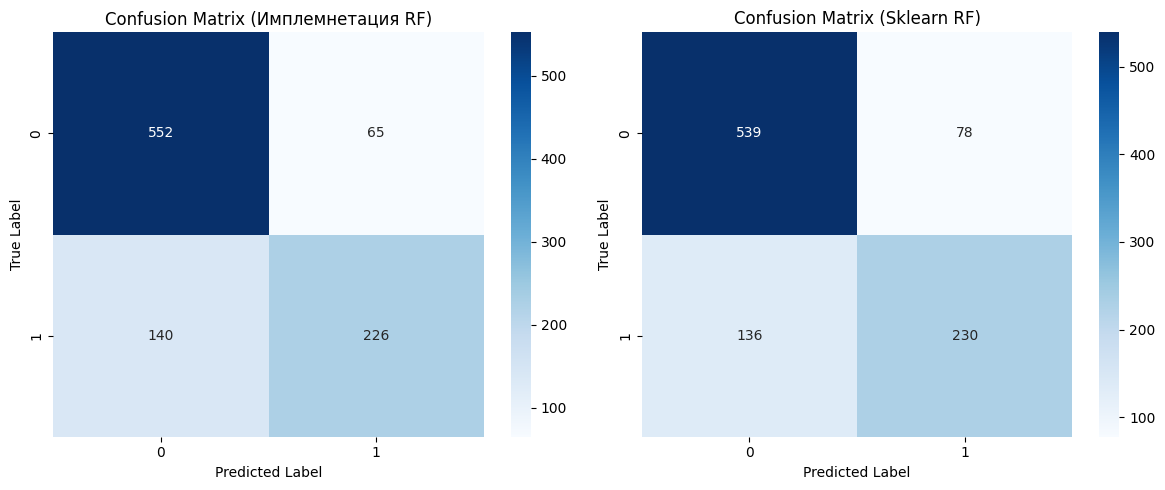

In [71]:
cm_matrix_cu = confusion_matrix(y_test_water_improved, y_pred_custom_clf_baseline)
cm_matrix_sklearn = confusion_matrix(y_test_water_improved, y_pred_sklearn_clf_baseline)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_matrix_cu, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix (Имплемнетация RF)')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
sns.heatmap(cm_matrix_sklearn, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix (Sklearn RF)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
plt.tight_layout()
plt.show()

*Метрики практически совпали, это подтверждает корректность реализации. Возможно имплементация сильнее подстроилась под данные, поэтому некоторые метрики чуть выше, чем у sklearn. Радует, что случайный лес лучше справляется с классификацией, чем предыдущие модели. По крайней мере, видно по матрице ошибок, что класс 0 и 1 хотя бы выделены цветом и преобладают над ошибками.*

Проверим собственную реализацию случайного леса для регрессии на улучшенных данных и сравним с реализацией из sklearn.


Регрессия (собственная реализация - улучшенные данные):
  MAE:   3.4569
  RMSE:  4.9794
  R²:    0.9084

Регрессия (sklearn реализация - улучшенные данные):
  MAE:   3.3975
  RMSE:  5.0226
  R²:    0.9068


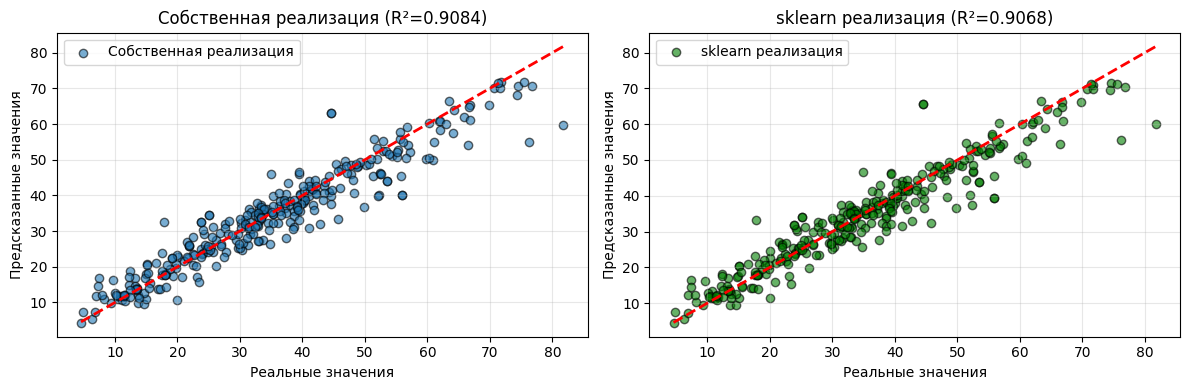

In [70]:
rm_custom_reg_improved = RandomForestRegressorCustom(n_estimators=100)
rm_custom_reg_improved.fit(X_train_concrete_fe.values, y_train_concrete_fe.values)
y_pred_custom_reg_improved = rm_custom_reg_improved.predict(X_test_concrete_fe.values)

rm_sklearn_reg_improved = RandomForestRegressor(n_estimators=100, random_state=42)
rm_sklearn_reg_improved.fit(X_train_concrete_fe, y_train_concrete_fe)
y_pred_sklearn_reg_improved = rm_sklearn_reg_improved.predict(X_test_concrete_fe)

# Метрики для регрессии
mae_custom_improved = mean_absolute_error(y_test_concrete_fe, y_pred_custom_reg_improved)
rmse_custom_improved = np.sqrt(mean_squared_error(y_test_concrete_fe, y_pred_custom_reg_improved))
r2_custom_improved = r2_score(y_test_concrete_fe, y_pred_custom_reg_improved)

mae_sklearn_improved = mean_absolute_error(y_test_concrete_fe, y_pred_sklearn_reg_improved)
rmse_sklearn_improved = np.sqrt(mean_squared_error(y_test_concrete_fe, y_pred_sklearn_reg_improved))
r2_sklearn_improved = r2_score(y_test_concrete_fe, y_pred_sklearn_reg_improved)

print(f"\nРегрессия (собственная реализация - улучшенные данные):")
print(f"  MAE:   {mae_custom_improved:.4f}")
print(f"  RMSE:  {rmse_custom_improved:.4f}")
print(f"  R²:    {r2_custom_improved:.4f}")

print(f"\nРегрессия (sklearn реализация - улучшенные данные):")
print(f"  MAE:   {mae_sklearn_improved:.4f}")
print(f"  RMSE:  {rmse_sklearn_improved:.4f}")
print(f"  R²:    {r2_sklearn_improved:.4f}")


fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# собственная реализация
axes[0].scatter(y_test_concrete_fe, y_pred_custom_reg_improved, alpha=0.6, edgecolors='k', label='Собственная реализация')
axes[0].plot([y_test_concrete_fe.min(), y_test_concrete_fe.max()], 
             [y_test_concrete_fe.min(), y_test_concrete_fe.max()], 'r--', lw=2)
axes[0].set_xlabel('Реальные значения')
axes[0].set_ylabel('Предсказанные значения')
axes[0].set_title(f'Собственная реализация (R²={r2_custom_improved:.4f})')
axes[0].grid(alpha=0.3)
axes[0].legend()

# sklearn реализация
axes[1].scatter(y_test_concrete_fe, y_pred_sklearn_reg_improved, alpha=0.6, edgecolors='k', color='green', label='sklearn реализация')
axes[1].plot([y_test_concrete_fe.min(), y_test_concrete_fe.max()], 
             [y_test_concrete_fe.min(), y_test_concrete_fe.max()], 'r--', lw=2)
axes[1].set_xlabel('Реальные значения')
axes[1].set_ylabel('Предсказанные значения')
axes[1].set_title(f'sklearn реализация (R²={r2_sklearn_improved:.4f})')
axes[1].grid(alpha=0.3)
axes[1].legend()
plt.tight_layout()
plt.show()

*Можем заметить небольшие отколнения метрик исмплементации от sklearn. Скорее всего причина таких метрик имплементации в том, что в ней произодится неточный поиск порога (без сортировок и тд), который приводит неоптимальным сплитам и снижению качетсва.*

## 4j. Выводы 

В данной лабораторной работе была реализована модель случайного леса для задач классификации и регрессии. Проведено сравнение собственной реализации с библиотечной версией из sklearn на сырых и улучшенных данных. 

Случайный лес — это ансамбль из множества деревьев решений, которые вместе дают более точный и устойчивый прогноз, чем одно дерево.

Как он работает:

1. Случайные подвыборки данных:

        Каждое дерево обучается не на всех данных, а на случайной части, отобранной с возвращением (bootstrap). Это значит, что одни и те же объекты могут попадать в выборку несколько раз, а другие — не попадать вовсе.

2. Случайные признаки:

        При построении каждого узла дерева рассматриваются не все признаки, а только случайно выбранные (например, √от общего числа). Это делает деревья разнообразными и снижает переобучение.

3. Агрегация ответов:  

        В классификации лес принимает решение по большинству голосов деревьев. В регрессии итоговый ответ — это среднее значение предсказаний всех деревьев.

За счёт случайности и усреднения/голосования случайный лес устойчив к шуму, редко переобучается и часто показывает высокое качество даже без тонкой настройки, что мы и могли заметить при обучении моделей на сырых данных.

Случайный лес хорошо справился с задачей классификации, значительно превзойдя по качеству предыдущие модели (логистическую регрессию и KNN). Модель лучше распознает классы даже при дисбалансе, метрики стали гораздо лучше.

Аналогично, для задачи регрессии случайный лес показал высокие значения R² и низкие ошибки, превосходя по качеству предыдущие модели (линейную регрессию, KNN).
